In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/ee/11/83ae52318353f9da4a88cc23e7f9dbc3d449b3f0fd6158fba15eb3c3b816/plotly-6.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.15.1 from https://files.pythonhosted.org/packages/70/c4/b83520ecc27840a4d58bd585ae0ec0f8a4f2b0c5a965b66749254a54de0e/narwhals-1.39.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 660.6 kB/s eta 0:00:25
   ---------------------------------------- 0.1/16.1 MB 751.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/16.1 MB 751.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/16.1 MB 751.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/16.1 MB 751.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/16.1 MB 75


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**K-Means on a synthetic data set**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [5]:
np.random.seed(0)

In [6]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

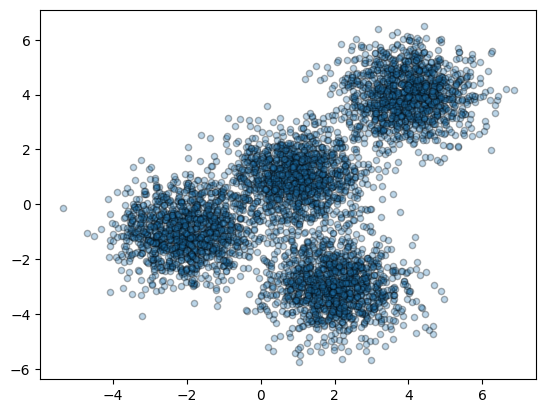

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker=".", alpha=0.3, ec='k', s=80)

In [33]:
k_means = KMeans(init= "k-means++", n_clusters= 5, n_init= 12)

In [34]:
k_means.fit(X)

KMeans(n_clusters=5, n_init=12)

In [35]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [36]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.13677632, -0.25701822],
       [ 3.97929125,  3.99329743],
       [ 2.00535715, -3.0241187 ],
       [ 1.09955667,  1.06624999],
       [-2.42666081, -1.36976411]])

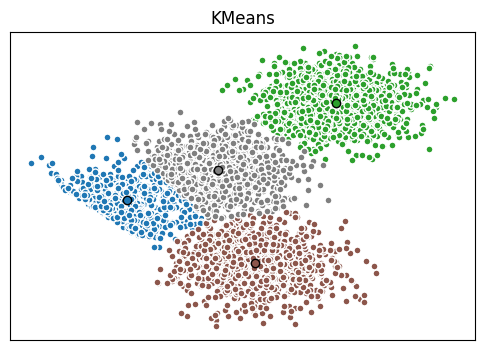

In [37]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".", markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

**Customer Segmentation with k-means**

In [38]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [ ]:
cust_df = cust_df.drop("Address", axis=1)
cust_df = cust_df.dropna()
cust_df.info()

In [45]:
X = cust_df.values[:, 1:] # excluding customer id
Clus_dateSet = StandardScaler().fit_transform(X)

In [46]:
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init= 12)
k_means.fit(X)
labels = k_means.labels_

In [47]:
cust_df["Clus_km"] = labels

In [48]:
cust_df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


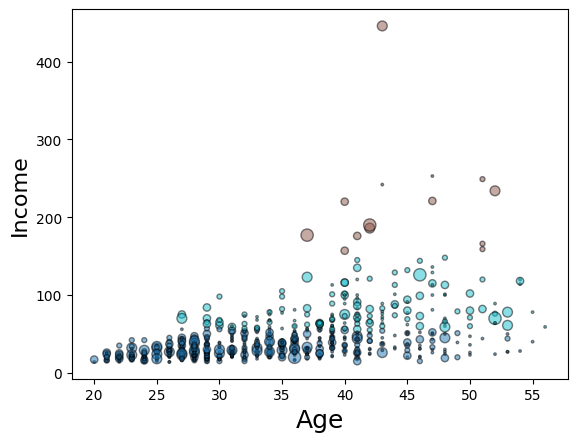

In [54]:
# determine the size of the marker (area) using education column
# plot Age on x, income on y
area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [61]:
# create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))
fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
    xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
))
fig.show()